In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Advertising Budget and Sales.csv")
df.head()


,index,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [61]:
df.isnull().sum()

index                      0
TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64

In [62]:
#Sửa tên + xoá cột
df = df.iloc[: ,1:] #Xoá mất cột index
df = df.rename(
    columns= {
        "TV Ad Budget ($)":"TV",
        "Radio Ad Budget ($)": "Radio",
        "Newspaper Ad Budget ($)": "Newspaper",
        "Sales ($)":"Sales",
    }
)

In [63]:
#Tính độ tương quan
corr_TV = df["Sales"].corr(df["TV"])
corr_TV

np.float64(0.7822244248616066)

In [64]:
corr_newspaper = df["Sales"].corr(df["Newspaper"])
corr_newspaper

np.float64(0.22829902637616534)

In [65]:
corr_radio = df["Sales"].corr(df["Radio"])
corr_radio

np.float64(0.5762225745710552)

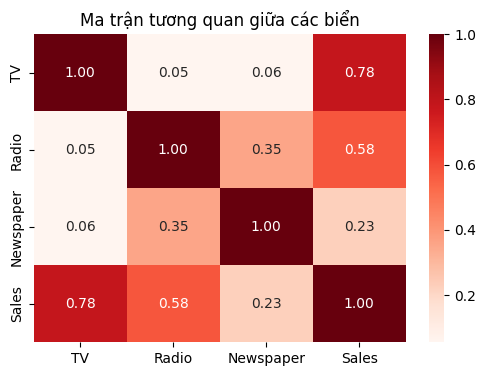

In [66]:
#Về bảng tương quan (heatmap)
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.Reds, fmt=".2f")
plt.title("Ma trận tương quan giữa các biển")
plt.show()

In [67]:
#Tạo mô hình: TV
model = LinearRegression()

X = df[["TV"]] #Const
y = df["Sales"] #Variable

#Chia tập train : test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 50)

#Khởi tạo và huấn luyện model
model.fit(X_test,y_test)

model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [68]:
#Tạo dựng hồi quy (dự đoán)
y_pred = model.predict(X_test)

In [11]:
# --- In thông tin mô hình ---
print("Hệ số hồi quy (slope):", model.coef_[0])
print("Hệ số chặn (intercept):", model.intercept_)
print(f"Phương trình: Sales = {model.intercept_:.2f} + {model.coef_[0]:.2f} * TV")

Hệ số hồi quy (slope): 0.04753664043301975
Hệ số chặn (intercept): 7.032593549127695
Phương trình: Sales = 7.03 + 0.05 * TV


In [73]:
# -----------------Đánh giá mô hình-----------------------#
mse = mean_squared_error(X_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"mse: {mse:.4f}")
print(f"r2: {r2:.4f}")

#So sánh thực tế
comparison = pd.DataFrame({"Thực tế":y_test,"Dự đoán":y_pred})
print(comparison.head())

mse: 22999.4738
r2: 0.4963
     Thực tế    Dự đoán
112     14.1  14.321490
165     11.9  16.477723
12       9.2   8.751218
73      11.0  12.623639
144     11.4  11.406173


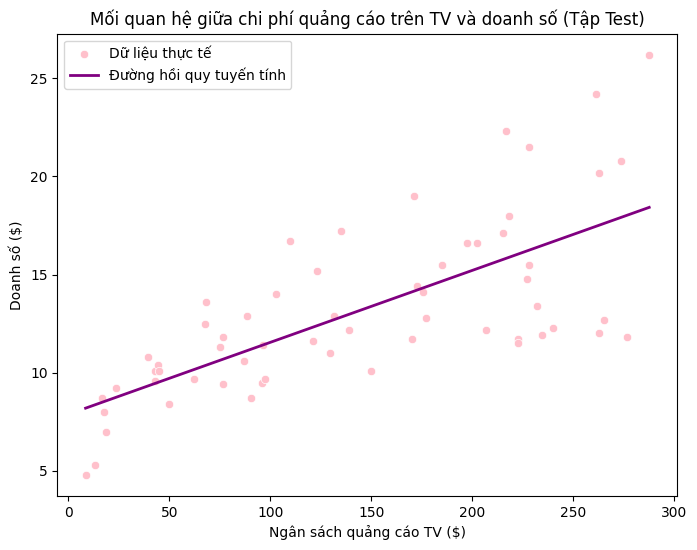

In [72]:
# Tạo DataFrame chứa giá trị thực tế và dự đoán
df_test = pd.DataFrame({
    'TV': X_test['TV'],
    'Doanh_so_thuc_te': y_test,
    'Doanh_so_du_doan': y_pred
})

# Sắp xếp theo giá trị TV để đường hồi quy mượt
df_test = df_test.sort_values(by='TV')

# Vẽ biểu đồ
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='TV', y='Doanh_so_thuc_te',
    data=df_test, color='pink', label='Dữ liệu thực tế'
)
plt.plot(
    df_test['TV'], df_test['Doanh_so_du_doan'],
    color='purple', linewidth=2, label='Đường hồi quy tuyến tính'
)
plt.title('Mối quan hệ giữa chi phí quảng cáo trên TV và doanh số (Tập Test)')
plt.xlabel('Ngân sách quảng cáo TV ($)')
plt.ylabel('Doanh số ($)')
plt.legend()
plt.show()